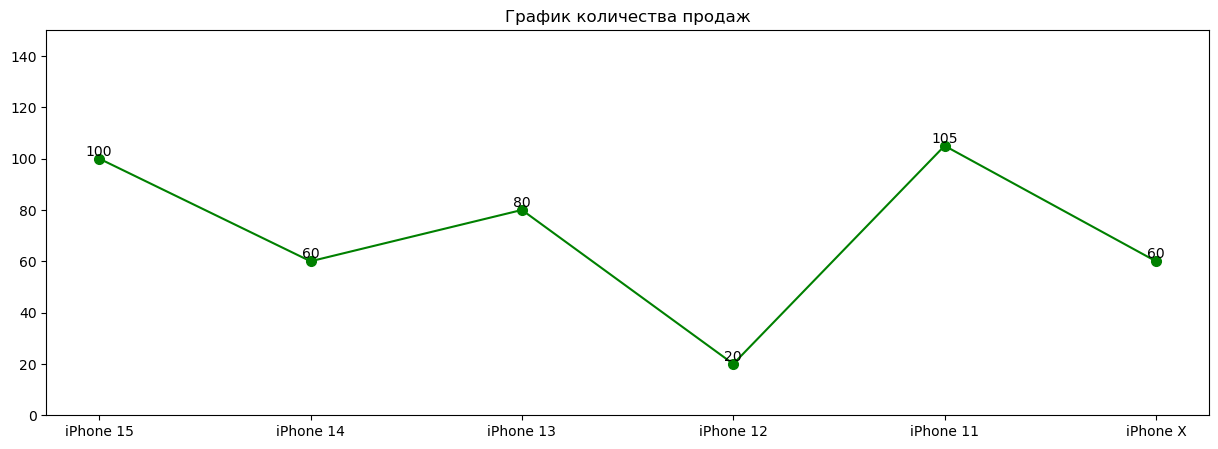

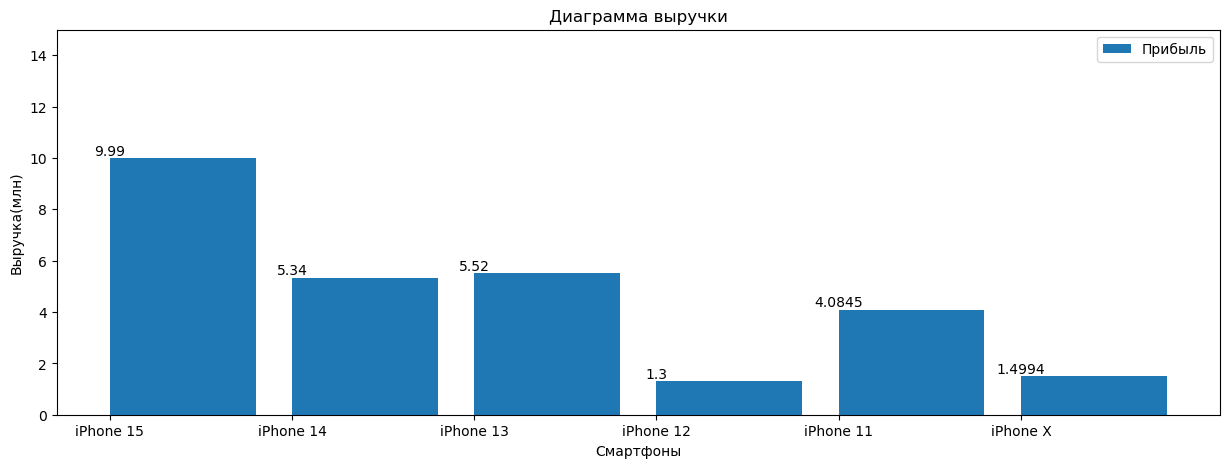

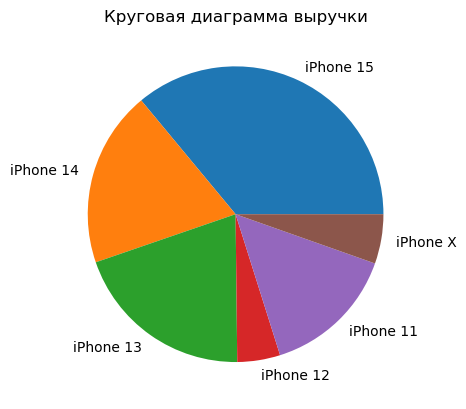

iPhone 15 продан 100 единиц, выручка: 36.02%
iPhone 14 продан 60 единиц, выручка: 19.25%
iPhone 13 продан 80 единиц, выручка: 19.9%
iPhone 12 продан 20 единиц, выручка: 4.69%
iPhone 11 продан 105 единиц, выручка: 14.73%
iPhone X продан 60 единиц, выручка: 5.41%

Общая выручка: 27733900 рублей
Товар, который продан больше всех: iPhone 11
Товар, который принес больше всех выручку: iPhone 15


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Хэш-таблица
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
class HashTable:
    def __init__(self):
        self.capacity = 10
        self.size = 0 
        self.buckets = [None] * self.capacity 

    def add(self, key, value):
        index = hash(key) % self.capacity 
        node = self.buckets[index]
        while node:
            if node.key == key: 
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()

    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None

    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity 
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets


# Сортировка пузырьком
def sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr     

try:
    data = pd.read_csv('table.csv', sep=';')
    with open("table.csv", encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter = ";")
        ht1 = HashTable() # Хэш таблица где будут хранится название товара/ключ и количество
        ht2 = HashTable() # Хэш таблица где будут хранится название товара/ключ и выручка
        ht3 = HashTable() # Хэш таблица где будут хранится выручка/ключ и название товара
        revenue = 0 # Обшая выручка
        maxA_tovar = 0 # Товар проданный больше всех

    
        max_sales = "" # Название товара проданный больше всех
        count_row = 0 # Кольчество строк в файле
        names_array, reven_array, amount_array = [], [], [] # Массивы имен, выручки и количества товаров

        for row in file_reader: # Считываем каждую строку
            if len(row) >= 7:
                if count_row != 0:
                    revenue += int(row[6]) 
    
                    if maxA_tovar < int(row[4]): # Меняем maxA_tovar так как он товар проданный больше всех
                        maxA_tovar = int(row[4])
                        maxA_sales = row[2]

                    reven_array.append(int(row[6])/1000000) # Добавляем в массив выручку в млн. рублей  
                    names_array.append(str(row[2])) # Добавояем в массив название товара
                    amount_array.append(int(row[4])) # Добавляем в массив количество товара

                    # Также добавляем в хэш таблицы нужные информации по каждому товару
                    ht1.add(str(row[2]), row[4])  
                    ht2.add(str(row[2]), row[6])
                    ht3.add(row[6], str(row[2]))
            count_row += 1
        
        # График количества продаж
        plt.figure(figsize=(15, 5))
        plt.title('График количества продаж')
        plt.ylim(0, 150)
        plt.plot(names_array, amount_array, color='green', marker='o', markersize=7)
        for i, value in enumerate(amount_array):
          plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
        plt.show()

        # Диаграмма выручки товаров
        plt.figure(figsize=(15, 5))
        plt.bar(names_array, reven_array, label='Прибыль', align='edge') 
        plt.xlabel('Смартфоны')
        plt.ylabel('Выручка(млн)')
        plt.ylim(0, 15)
        plt.title('Диаграмма выручки')
        plt.legend()
        for i, value in enumerate(reven_array):
          plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
        plt.show()

        # Круговая диаграмма выручки товаров
        plt.pie(reven_array, labels=names_array)
        plt.title("Круговая диаграмма выручки")
        plt.show()

        for item in range(len(names_array)): # Выводим информацию выручки об каждом товаре 
            print(f'{names_array[item]} продан {ht1.get(names_array[item])} единиц, выручка: {round(int(ht2.get(names_array[item]))/revenue*100,2)}%')

        result = sort(reven_array)

        # Выводим результат
        print()
        print(f'Общая выручка: {revenue} рублей')
        print(f'Товар, который продан больше всех: {maxA_sales}')
        print(f'Товар, который принес больше всех выручку: {ht3.get(str(int(result[-1]*1000000)))}')
except FileNotFoundError:
    print("Файл 'table.csv' не найден.") # Ошибка если не найден файл
except ValueError as e:
    print(f"Ошибка при обработке данных файла:{e}") # Ошибка если что то не так с данными
except Exception as e: # Иные ошибки
    print(f"Неизвестная ошибка:{e}")

